In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
train=pd.read_csv('C:/Users/Сергей/Desktop/Tweets/train.csv')
test=pd.read_csv('C:/Users/Сергей/Desktop/Tweets/test.csv')
ss=pd.read_csv('C:/Users/Сергей/Desktop/Tweets/sample_submission.csv')
display(train)
display(test)
display(ss)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [3]:
y=train['target']
train=pd.Series(train['text'])
test=pd.Series(test['text'])
print(y)
print(train)
print(test)

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64
0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object
0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are.

In [4]:
print(y.mean())
train=train.str.lower()
print(train)
test=test.str.lower()
print(test)

0.4296597924602653
0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object
0                      just happened a terrible car crash
1       heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                apocalypse lighting. #spokane #wildfires
4           typhoon soudelor kills 28 in china and taiwan
             

In [5]:
vect=TfidfVectorizer(min_df=5).fit(train)
train_vect=vect.transform(train)
test_vect=vect.transform(test)
print(train_vect)
print(test_vect)

  (0, 2582)	0.3037611197993475
  (0, 2432)	0.2233954196743151
  (0, 2417)	0.12619636000075332
  (0, 1967)	0.40523875477326776
  (0, 1744)	0.3140822230077726
  (0, 1700)	0.14879439825274218
  (0, 1513)	0.3216783232017078
  (0, 780)	0.36043405994526756
  (0, 208)	0.23500933153726383
  (0, 151)	0.4488557726990636
  (0, 150)	0.25846032070106784
  (1, 1647)	0.4322914462990095
  (1, 1358)	0.4958432886180763
  (1, 984)	0.42124436585369884
  (1, 947)	0.32674179337541426
  (1, 441)	0.5320305661213975
  (2, 2462)	0.07864879469811047
  (2, 2168)	0.5132717649034155
  (2, 2009)	0.24757257735680935
  (2, 1823)	0.42087907520140855
  (2, 1742)	0.19686789942060762
  (2, 1739)	0.23479856627992446
  (2, 1736)	0.1461632214844059
  (2, 1706)	0.24757257735680935
  (2, 1668)	0.13900740890739527
  :	:
  (7611, 2028)	0.350044275735632
  (7611, 1848)	0.2178739493746173
  (7611, 1670)	0.3136347089058529
  (7611, 1428)	0.25980174277224294
  (7611, 1409)	0.2332007675043248
  (7611, 1280)	0.3078966793522149
  (7611

In [6]:
X_train,X_val,y_train,y_val=train_test_split(train_vect,y,test_size=0.15,random_state=0)
X_test=test_vect
print(X_train[0,:])
print('\n')
print(X_val[0,:])

  (0, 1996)	0.25608580174129275
  (0, 1767)	0.20512202463248935
  (0, 1450)	0.24944685239616482
  (0, 943)	0.2197395314619918
  (0, 754)	0.23504487597681903
  (0, 412)	0.8524023284674555


  (0, 2769)	0.18637058911499116
  (0, 2730)	0.2884269105497249
  (0, 2432)	0.20743225220280523
  (0, 2174)	0.32372447192663684
  (0, 2146)	0.3911257053287908
  (0, 1736)	0.25325327020734284
  (0, 1353)	0.2849039338877522
  (0, 1208)	0.2560532271300905
  (0, 1060)	0.3532887469141472
  (0, 213)	0.3439079238981363
  (0, 160)	0.3568117235761199


Best params: {'alpha': 0.1}
Best score: 0.7543568762881221


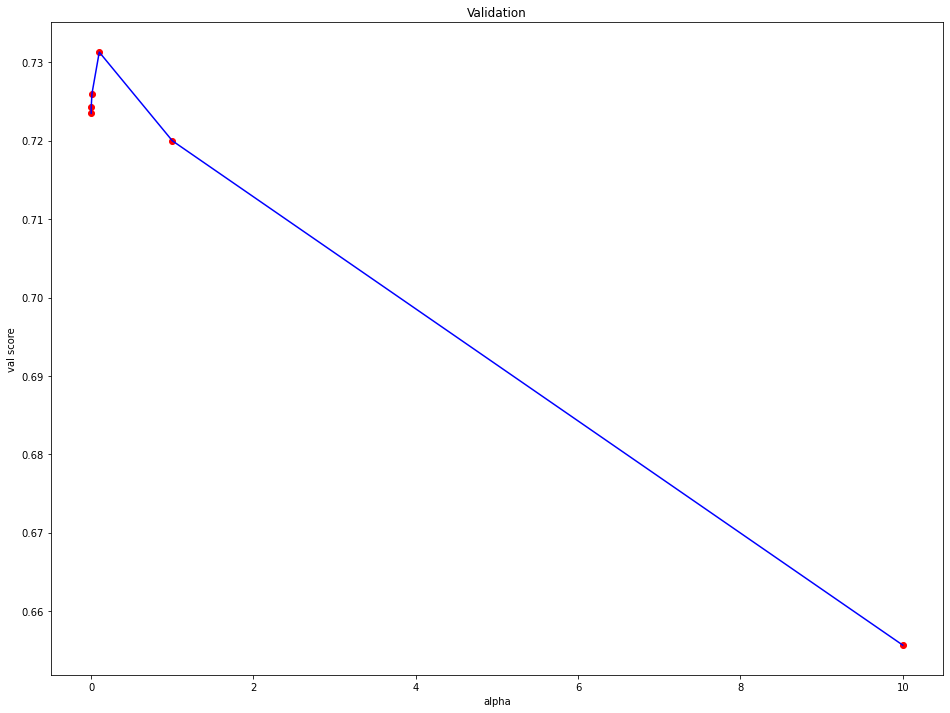

In [7]:
a=[0.0001,0.001,0.01,0.1,1,10]
grid=GridSearchCV(MultinomialNB(),{'alpha':a},scoring='f1').fit(X_train,y_train)
print('Best params:',grid.best_params_)
print('Best score:',grid.best_score_)
scores=[]
for i in range(len(a)):
    clf_=MultinomialNB(alpha=a[i]).fit(X_train,y_train)
    scores.append(f1_score(y_val,clf_.predict(X_val)))
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Validation')
ax.set_xlabel('alpha')
ax.set_ylabel('val score')
ax.plot(a,scores,color='b')
ax.scatter(a,scores,color='r')
plt.show()

In [8]:
clf=MultinomialNB(alpha=0.1).fit(X_train,y_train)
metrics=np.array([[accuracy_score(y_train,clf.predict(X_train)),precision_score(y_train,clf.predict(X_train)),recall_score(y_train,clf.predict(X_train)),f1_score(y_train,clf.predict(X_train))],[accuracy_score(y_val,clf.predict(X_val)),precision_score(y_val,clf.predict(X_val)),recall_score(y_val,clf.predict(X_val)),f1_score(y_val,clf.predict(X_val))]]).T
results=pd.DataFrame(columns=['Train','Validation'],index=['Accuracy','Precision','Recall','F1-score'],data=metrics)
display(results)

,Train,Validation
Accuracy,0.851955,0.798599
Precision,0.888141,0.804627
Recall,0.753210,0.670236
F1-score,0.815129,0.731308


Best params: {'C': 10, 'gamma': 1}
Best score: 0.7456063120241991


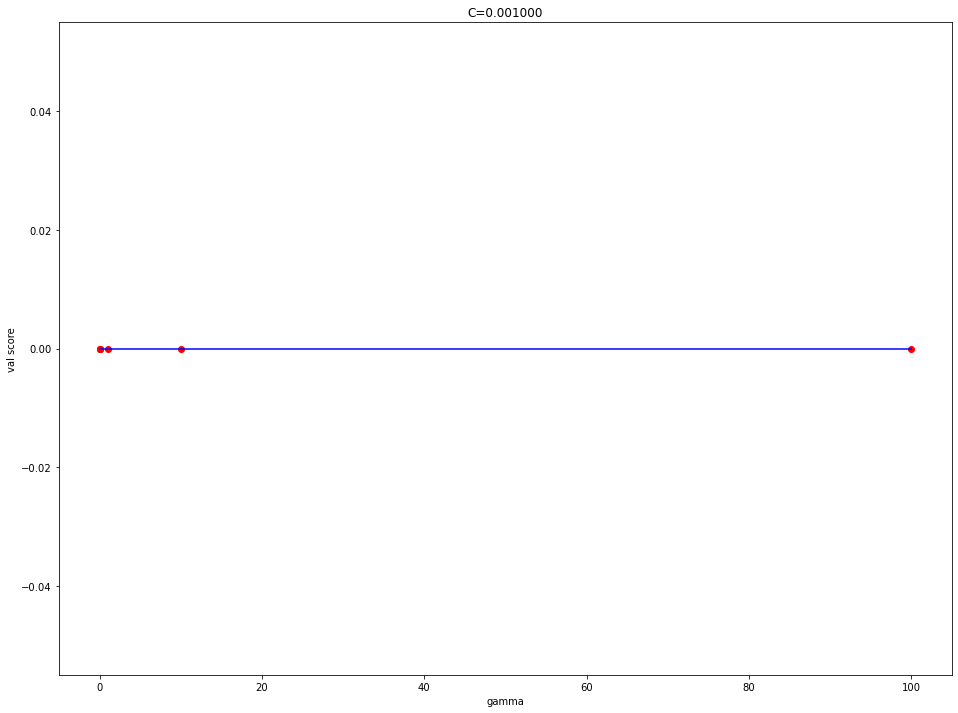

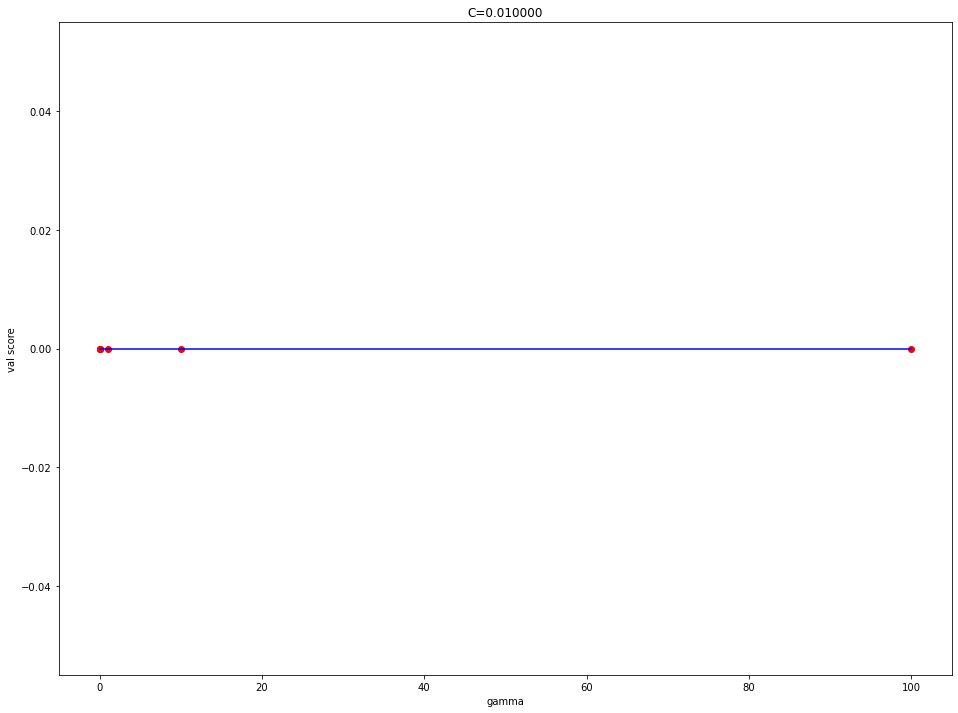

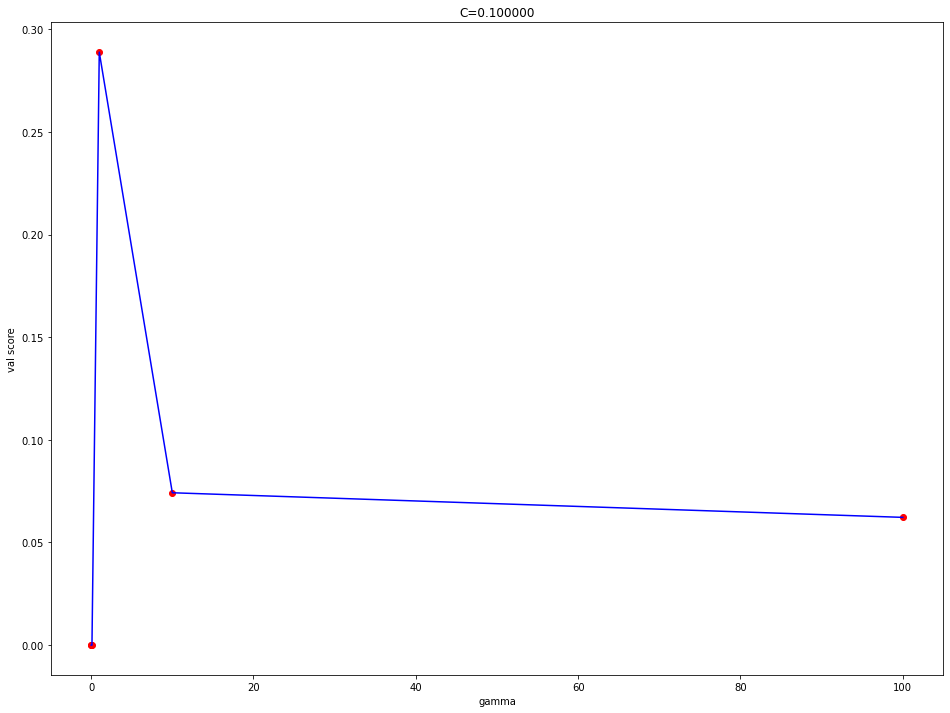

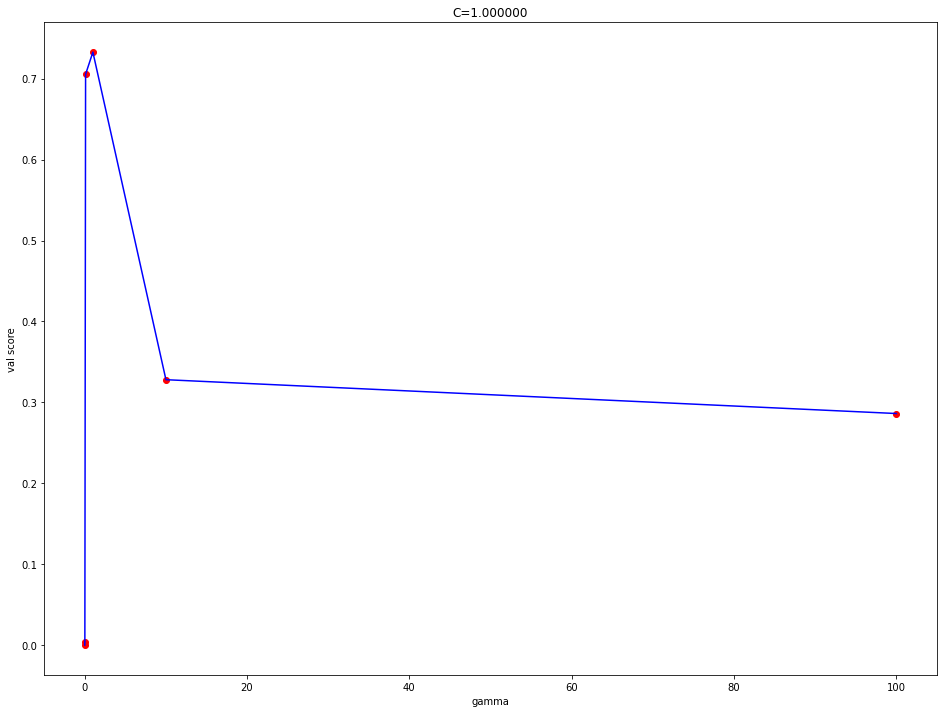

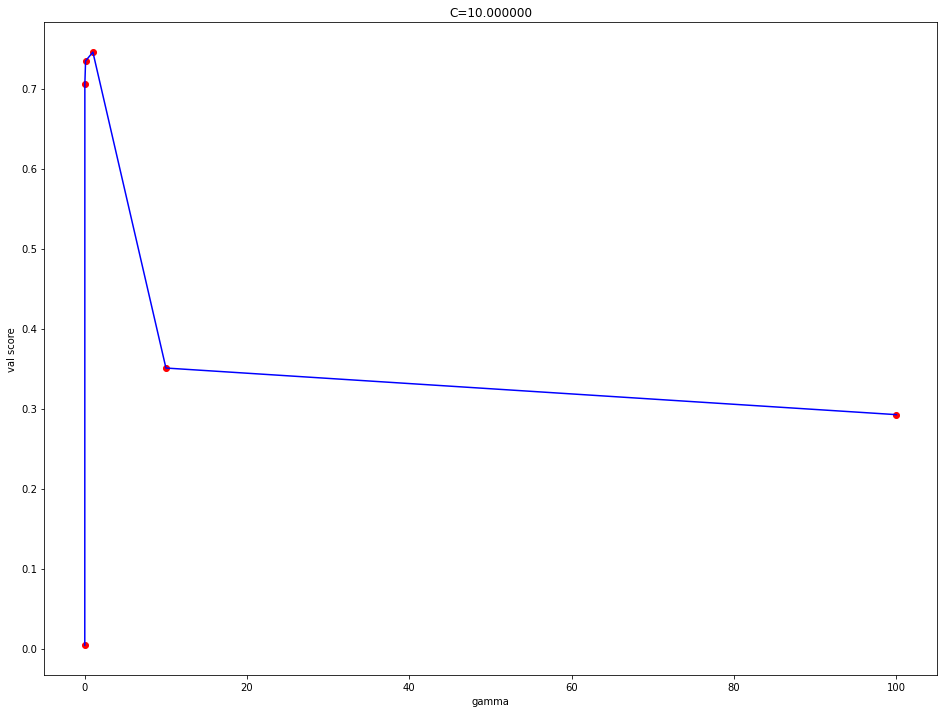

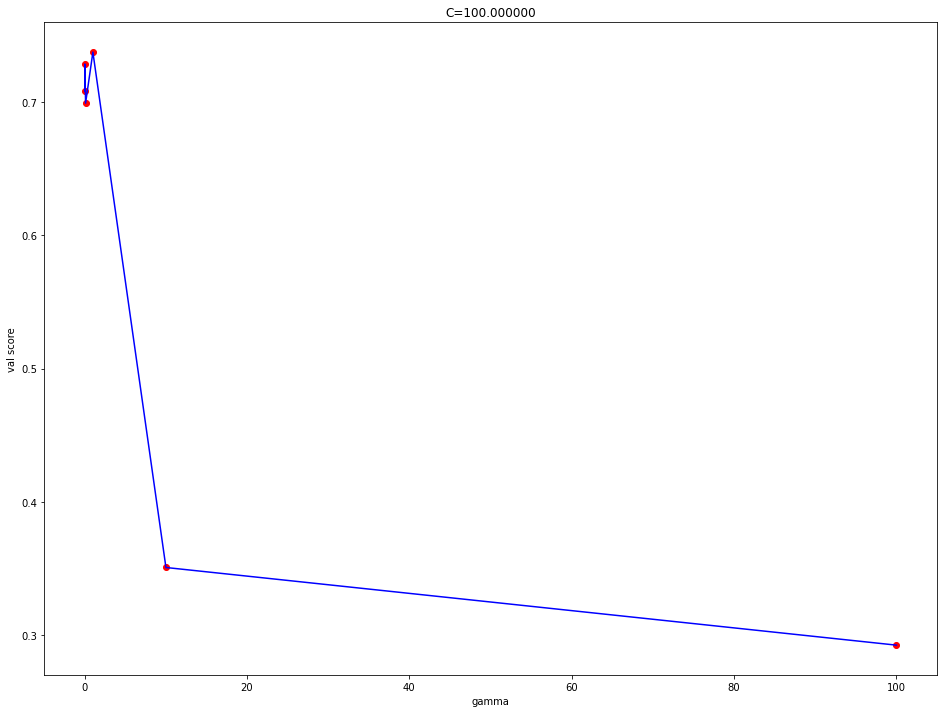

In [17]:
c=[0.001,0.01,0.1,1,10,100]
g=[0.001,0.01,0.1,1,10,100]
grid=GridSearchCV(SVC(),{'C':c,'gamma':g},scoring='f1').fit(X_train,y_train)
print('Best params:',grid.best_params_)
print('Best score:',grid.best_score_)
for i in range(len(c)):
    scores=[]
    for j in range(len(g)):
        clf_=SVC(C=c[i],gamma=g[j]).fit(X_train,y_train)
        scores.append(f1_score(y_val,clf_.predict(X_val)))
    fig=plt.figure(figsize=(16,12))
    ax=fig.add_subplot(1,1,1)
    ax.set_title('C=%f'%c[i])
    ax.set_xlabel('gamma') 
    ax.set_ylabel('val score')
    ax.plot(g,scores,color='b')
    ax.scatter(g,scores,color='r')
    plt.show()

In [27]:
clf=SVC(C=100,gamma=1).fit(X_train,y_train)
metrics=np.array([[accuracy_score(y_train,clf.predict(X_train)),precision_score(y_train,clf.predict(X_train)),recall_score(y_train,clf.predict(X_train)),f1_score(y_train,clf.predict(X_train))],[accuracy_score(y_val,clf.predict(X_val)),precision_score(y_val,clf.predict(X_val)),recall_score(y_val,clf.predict(X_val)),f1_score(y_val,clf.predict(X_val))]]).T
results=pd.DataFrame(columns=['Train','Validation'],index=['Accuracy','Precision','Recall','F1-score'],data=metrics)
display(results)

,Train,Validation
Accuracy,0.985319,0.802977
Precision,0.989519,0.810256
Recall,0.976462,0.676660
F1-score,0.982947,0.737456


Best params: {'C': 1, 'degree': 1}
Best score: 0.7459313256471682


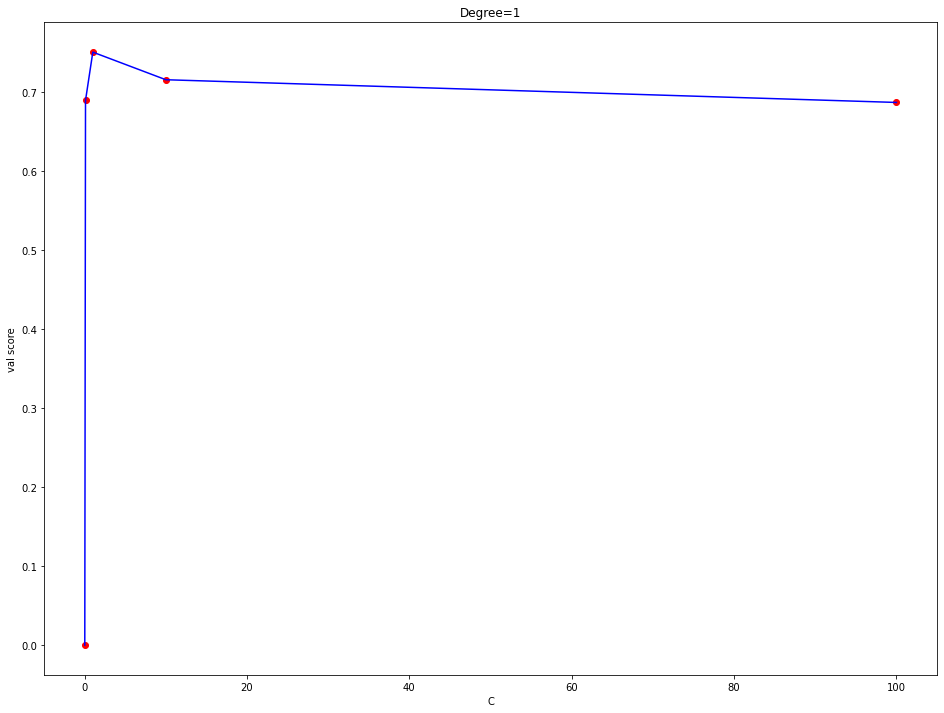

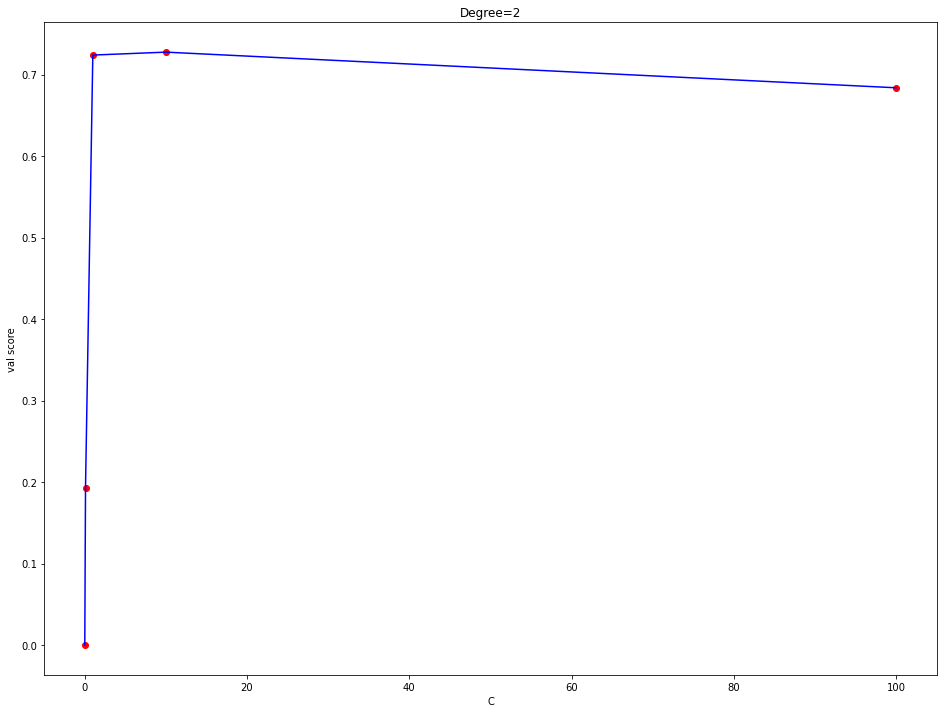

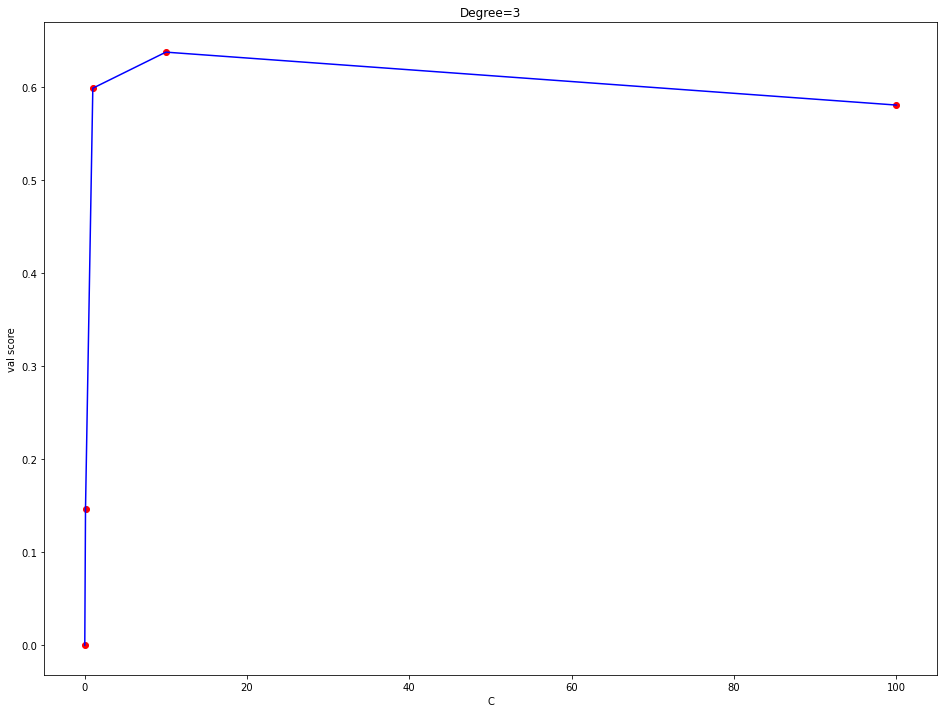

In [10]:
c=[0.01,0.1,1,10,100]
d=[1,2,3]
grid=GridSearchCV(SVC(kernel='poly'),{'C':c,'degree':d},scoring='f1').fit(X_train,y_train)
print('Best params:',grid.best_params_)
print('Best score:',grid.best_score_)
for i in range(len(d)):
    scores=[]
    for j in range(len(c)):
        clf_=SVC(kernel='poly',C=c[j],degree=d[i]).fit(X_train,y_train)
        scores.append(f1_score(y_val,clf_.predict(X_val)))
    fig=plt.figure(figsize=(16,12))
    ax=fig.add_subplot(1,1,1)
    ax.set_title('Degree=%d'%d[i])
    ax.set_xlabel('C') 
    ax.set_ylabel('val score')
    ax.plot(c,scores,color='b')
    ax.scatter(c,scores,color='r')
    plt.show()

In [11]:
clf=SVC(kernel='poly',C=1,degree=1).fit(X_train,y_train)
metrics=np.array([[accuracy_score(y_train,clf.predict(X_train)),precision_score(y_train,clf.predict(X_train)),recall_score(y_train,clf.predict(X_train)),f1_score(y_train,clf.predict(X_train))],[accuracy_score(y_val,clf.predict(X_val)),precision_score(y_val,clf.predict(X_val)),recall_score(y_val,clf.predict(X_val)),f1_score(y_val,clf.predict(X_val))]]).T
results=pd.DataFrame(columns=['Train','Validation'],index=['Accuracy','Precision','Recall','F1-score'],data=metrics)
display(results)

,Train,Validation
Accuracy,0.875908,0.815236
Precision,0.913259,0.838624
Recall,0.788516,0.678801
F1-score,0.846316,0.750296


Best params: {'C': 1}
Best score: 0.7994115997207187


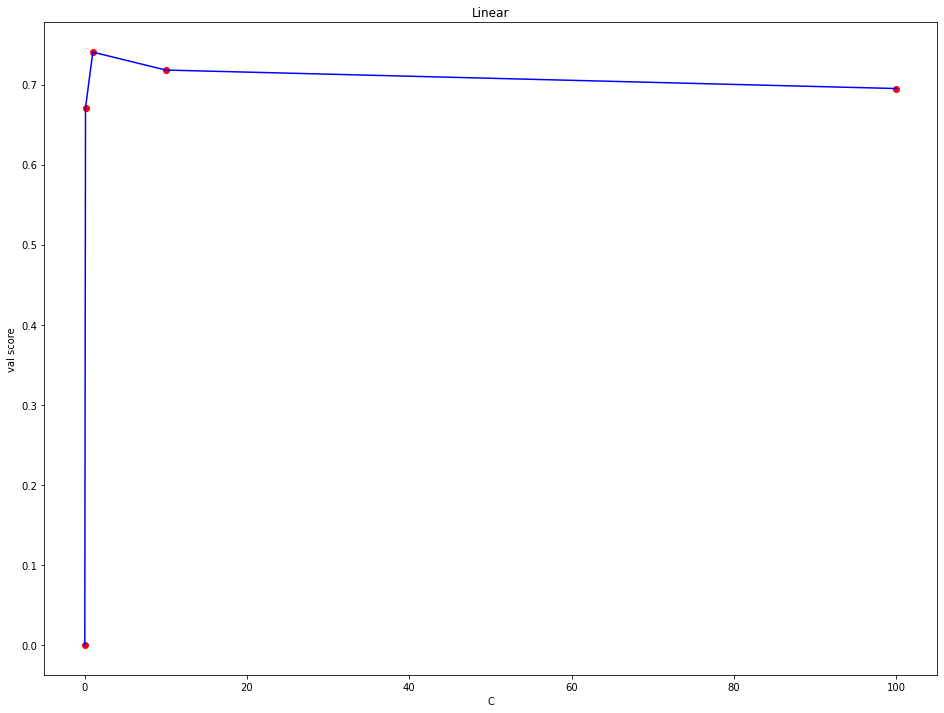

In [22]:
c=[0.01,0.1,1,10,100]
grid=GridSearchCV(SVC(kernel='linear'),{'C':c}).fit(X_train,y_train)
print('Best params:',grid.best_params_)
print('Best score:',grid.best_score_)
scores=[]
for i in range(len(c)):
    clf_=SVC(kernel='linear',C=c[i]).fit(X_train,y_train)
    scores.append(f1_score(y_val,clf_.predict(X_val)))
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Linear')
ax.set_xlabel('C')
ax.set_ylabel('val score')
ax.plot(c,scores,color='b')
ax.scatter(c,scores,color='r')
plt.show()

In [23]:
clf=SVC(kernel='linear',C=1).fit(X_train,y_train)
metrics=np.array([[accuracy_score(y_train,clf.predict(X_train)),precision_score(y_train,clf.predict(X_train)),recall_score(y_train,clf.predict(X_train)),f1_score(y_train,clf.predict(X_train))],[accuracy_score(y_val,clf.predict(X_val)),precision_score(y_val,clf.predict(X_val)),recall_score(y_val,clf.predict(X_val)),f1_score(y_val,clf.predict(X_val))]]).T
results=pd.DataFrame(columns=['Train','Validation'],index=['Accuracy','Precision','Recall','F1-score'],data=metrics)
display(results)

,Train,Validation
Accuracy,0.892907,0.807356
Precision,0.931345,0.824147
Recall,0.812767,0.672377
F1-score,0.868025,0.740566


In [12]:
ss['target']=clf.predict(test_vect)
display(ss)
ss.to_csv('tweets.csv',index=False)

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
